In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('combined_data.csv')
le = LabelEncoder()
label=le.fit_transform(data['Protocol'])
data['Protocol']=label

In [ ]:
data = data.drop(data.columns[0], axis=1)

In [ ]:
data.describe()

,Time,Protocol,Length,Target
count,3.172390e+05,317239.000000,317239.000000,317239.000000
mean,6.745880e+01,14.254222,492.194393,0.945650
std,1.916876e+02,3.108322,952.918346,0.226708
min,3.610000e-07,0.000000,42.000000,0.000000
25%,5.406614e-01,14.000000,66.000000,1.000000
50%,1.879724e+00,14.000000,74.000000,1.000000
75%,5.238090e+01,17.000000,1152.000000,1.000000
max,9.699905e+02,17.000000,44954.000000,1.000000


In [ ]:
data=data.dropna()

In [ ]:
corr_matrix = data.corr()
corr_matrix

,Time,Protocol,Length,Target
Time,1.000000,-0.167834,-0.047586,-0.956120
Protocol,-0.167834,1.000000,-0.156231,0.104349
Length,-0.047586,-0.156231,1.000000,0.016479
Target,-0.956120,0.104349,0.016479,1.000000


In [ ]:
X = data[['Time','Protocol','Length']]
y = data['Target']

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
indices

[0, 2, 1]

In [ ]:
X=data[['Time','Length']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.33721991, -0.45984536],
       [-0.33719915, -0.45984536],
       [-0.33694828, -0.45984536],
       ...,
       [-0.33453992,  1.07229252],
       [-0.3345398 ,  1.07229252],
       [-0.33453965,  1.07229252]])

In [ ]:
data

,Time,Source,Destination,Protocol,Length,Info,Target
0,2.818017,192.168.112.128,49.44.194.34,14,54,40492 > 80 [ACK] Seq=1 Ack=1 Win=64008 Len=0,0
1,2.821997,192.168.112.128,49.44.194.34,14,54,40510 > 80 [ACK] Seq=1 Ack=1 Win=63936 Len=0,0
2,2.870084,192.168.112.128,152.195.38.76,14,54,49232 > 80 [ACK] Seq=1 Ack=1 Win=63812 Len=0,0
3,2.926170,192.168.112.128,49.44.194.34,14,54,40498 > 80 [ACK] Seq=1 Ack=1 Win=63936 Len=0,0
4,3.842613,192.168.112.128,49.44.194.34,14,54,[TCP Dup ACK 5#1] 40510 > 80 [ACK] Seq=1 Ack...,0
...,...,...,...,...,...,...,...
317234,3.331675,192.168.112.128,192.168.112.129,14,1514,52492 > 80 [ACK] Seq=10217865 Ack=1 Win=501 ...,1
317235,3.331716,192.168.112.128,192.168.112.129,14,1514,52456 > 80 [ACK] Seq=10887833 Ack=1 Win=501 ...,1
317236,3.331736,192.168.112.128,192.168.112.129,14,1514,49876 > 80 [ACK] Seq=12450561 Ack=1 Win=501 ...,1
317237,3.331760,192.168.112.128,192.168.112.129,14,1514,52492 > 80 [ACK] Seq=10219313 Ack=1 Win=501 ...,1


In [ ]:
X = data.iloc[:,[0,3,4]].values
X[:,0]=X_scaled[:,0]*-1
X[:,2]=X_scaled[:,1]
X

array([[ 0.33721991, 14.        , -0.45984536],
       [ 0.33719915, 14.        , -0.45984536],
       [ 0.33694828, 14.        , -0.45984536],
       ...,
       [ 0.33453992, 14.        ,  1.07229252],
       [ 0.3345398 , 14.        ,  1.07229252],
       [ 0.33453965, 14.        ,  1.07229252]])

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
317234    1
317235    1
317236    1
317237    1
317238    1
Name: Target, Length: 317239, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,train_size=0.8)
X_train = np.asarray(X_train)
X_test= np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
7931/7931 [==============================] - 16s 2ms/step - loss: 0.0364 - accuracy: 0.9896
Epoch 2/3
7931/7931 [==============================] - 16s 2ms/step - loss: 0.0122 - accuracy: 0.9978
Epoch 3/3
7931/7931 [==============================] - 18s 2ms/step - loss: 0.0104 - accuracy: 0.9981


In [ ]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
predictions = model.predict(X_test)
predictions

1983/1983 [==============================] - 2s 1ms/step


array([[1.       ],
       [1.       ],
       [0.9999571],
       ...,
       [0.       ],
       [1.       ],
       [0.9999786]], dtype=float32)

In [ ]:
predictions = np.where(predictions > 0.5, 1, 0)

In [ ]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm

array([[ 3316,    85],
       [    0, 60047]])

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(accuracy,precision,recall, f1)

0.998660320262262 0.9985864431583849 1.0 0.9992927216901455


In [ ]:
model2 = Sequential()
model2.add(Dense(20, input_dim=X.shape[1], activation='leaky_relu'))
model2.add(Dropout(0.2))
model2.add(Dense(12, activation='leaky_relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
7931/7931 [==============================] - 17s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0625
Epoch 2/3
7931/7931 [==============================] - 20s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0545
Epoch 3/3
7931/7931 [==============================] - 20s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0545


In [ ]:
model3 = Sequential()
model3.add(Dense(20, input_dim=X.shape[1], activation='relu'))
model3.add(Dense(12, activation='leaky_relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(X_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
7931/7931 [==============================] - 15s 2ms/step - loss: 0.0225 - accuracy: 0.9957
Epoch 2/3
7931/7931 [==============================] - 15s 2ms/step - loss: 0.0119 - accuracy: 0.9978
Epoch 3/3
7931/7931 [==============================] - 16s 2ms/step - loss: 0.0109 - accuracy: 0.9980


In [ ]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)
np.unique(labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1], dtype=int32)

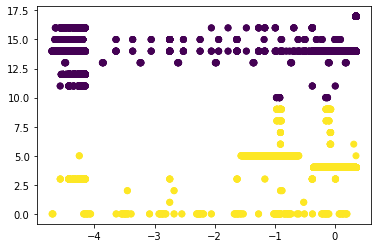

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()